In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
def import_dict(path):
    with open(path) as f:
        d_s = f.read()
    histories=[]
    for i, fold in enumerate(d_s.split('}')):
        string= ''
        if(i<5):
            for k, metric in enumerate(fold.split(']')):     
                if(i!=0 and k==0 and k<4):
                    string += metric[3:]+'],'
                elif k<4: 
                    string += metric[2:]+'],'
            string = '{' + string + '}'        
            histories.append(ast.literal_eval(string))
    return histories

In [60]:
def training_show( histories , name):
    
    fig= plt.figure(figsize=(15,6))
    df = pd.DataFrame()

    for i, history in enumerate(histories) :
        keys, val_keys = [k for k in history.keys() if 'val_' not in k], [k for k in history.keys() if 'val_' in k]

        data = pd.DataFrame({k : history[k] for k in keys}, columns = keys)
        data['type'] = "T_" + str(i)
        data['epoch'] = list(range(len(data['type'])))

        val_data = pd.DataFrame({k.replace("val_", "") : history[k] for k in val_keys}, columns = keys)
        val_data["type"] = "V_" + str(i)
        val_data["epoch"] = list(range(len(val_data["type"])))

        if df.empty:
            df = pd.concat([data, val_data]).reset_index(drop=True)
        else:
            tmp = pd.concat([data, val_data]).reset_index(drop=True)
            df = pd.concat([df, tmp]).reset_index(drop=True)        

    df.sort_values(by=['type'], inplace = True)
    df.reset_index(drop=True)

    for i, k in enumerate(df.columns[0:-2]):
        n = (df.shape[0]/2)-1 if len(df[df.type.str.contains('V', case=False)]) > 0 else df.shape[0]-1

        plt.subplot(1, 2, i+1)
        plt.title(k)

        sns.lineplot(data = df.iloc[:int(n)], x = "epoch", y = k, hue = "type", palette=['turquoise']*5,legend = i == (len(df.columns[0:-2])-1))
        sns.lineplot(data = df.iloc[int(n+1):], x = "epoch", y = k, hue = "type",palette=['lightcoral']*5, legend = i == (len(df.columns[0:-2])-1))
    title = name.split('/')[0].replace('_no_',' without ') if 'no' in name else name.split('/')[0].replace('_',' with ')
    plt.suptitle('Training of ' + title , fontsize=14)
    
    plt.savefig('img_result/' + title.replace(' ', '_') + '.png')
    plt.show()

['mlp_tuning/histories.txt', 'mlp_no_tuning/histories.txt', 'leNet5_tuning/histories.txt', 'leNet5_no_tuning/histories.txt', 'cnn_custom_tuning/histories.txt', 'cnn_custom_no_tuning/histories.txt', 'alexNet_tuning/histories.txt', 'alexNet_no_tuning/histories.txt']


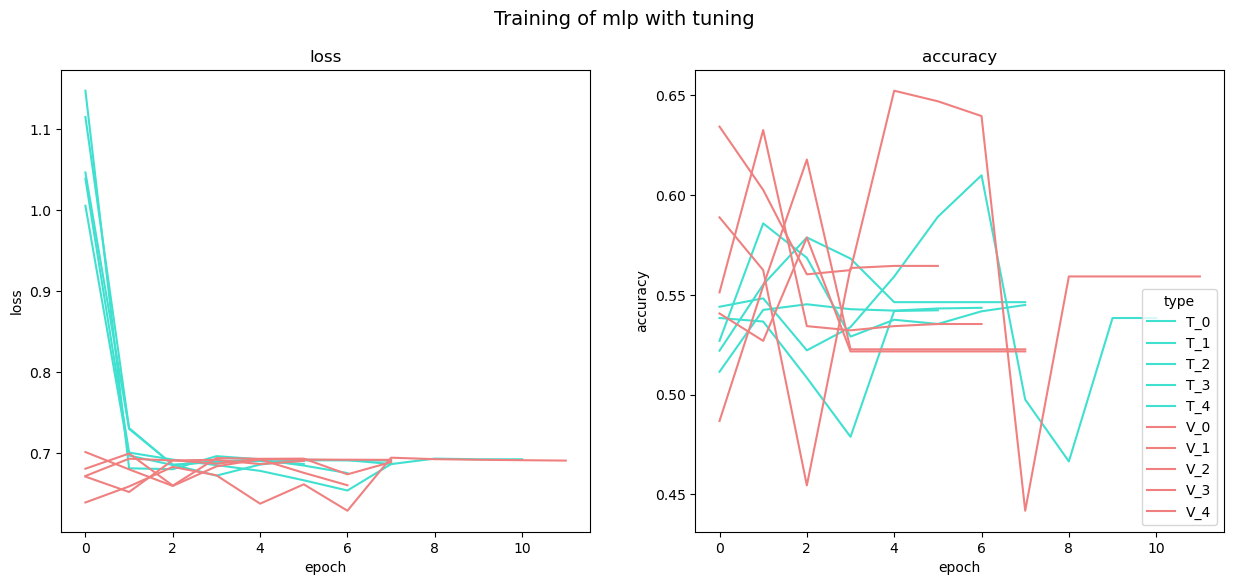

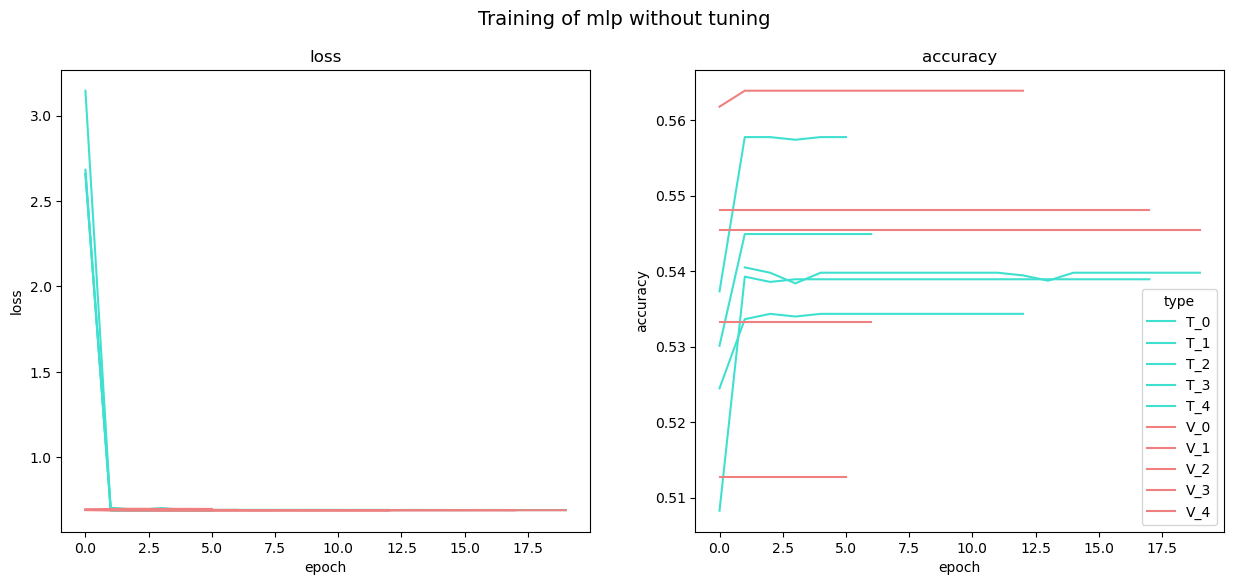

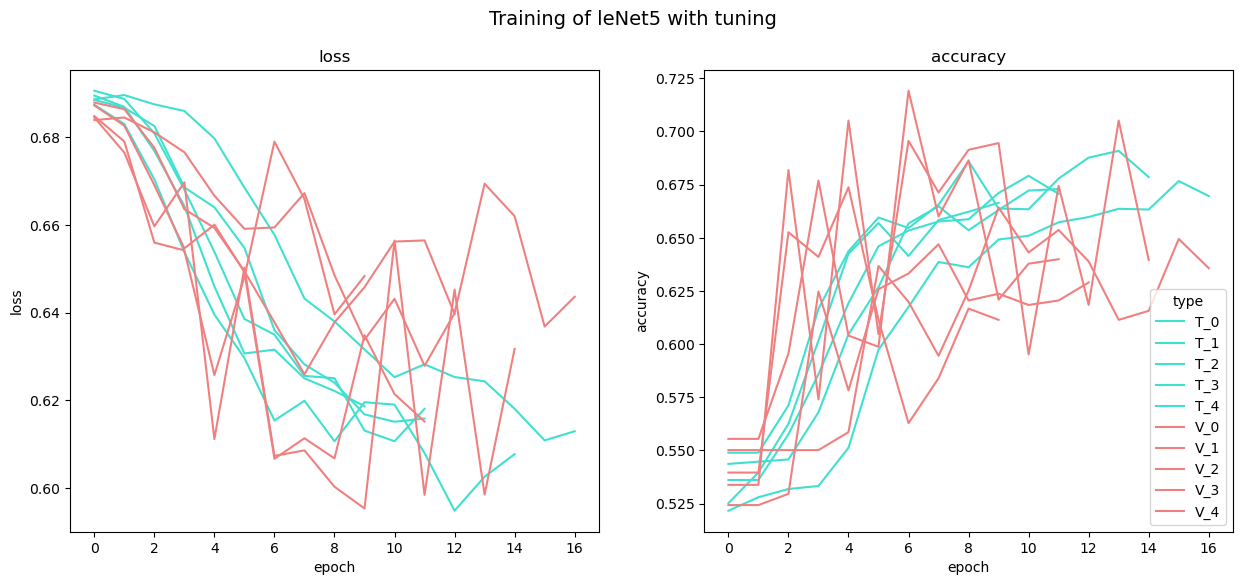

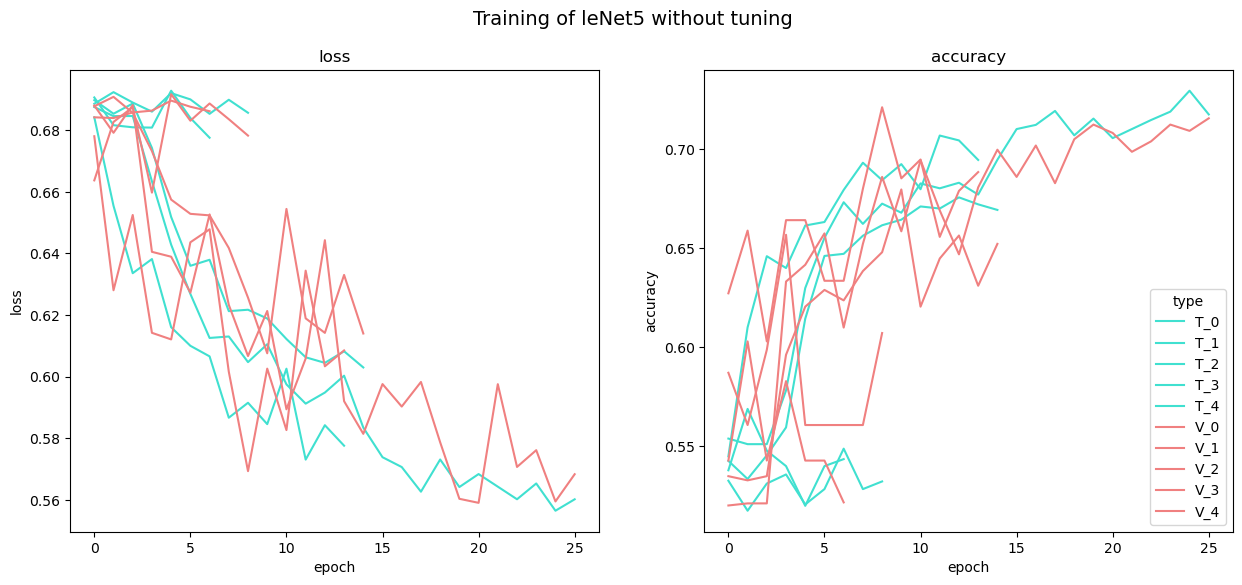

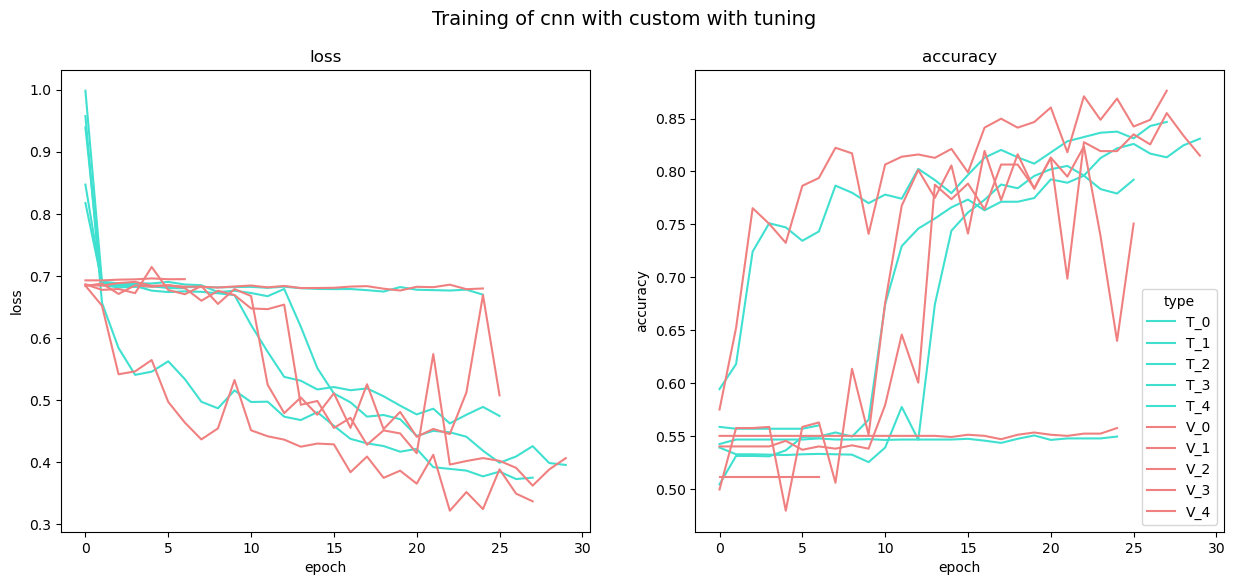

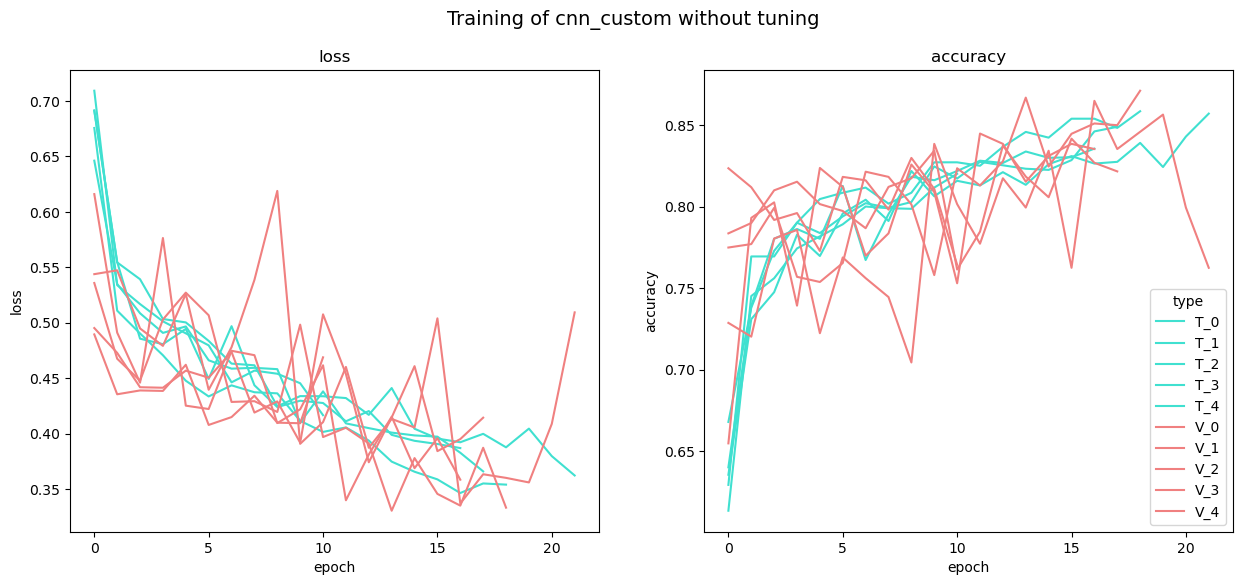

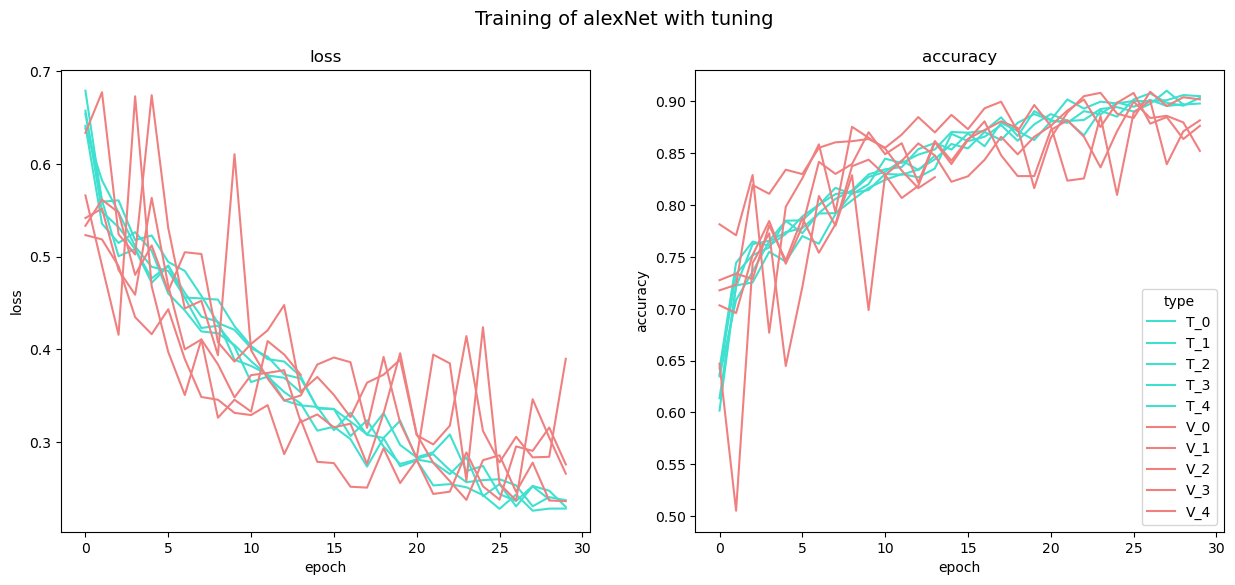

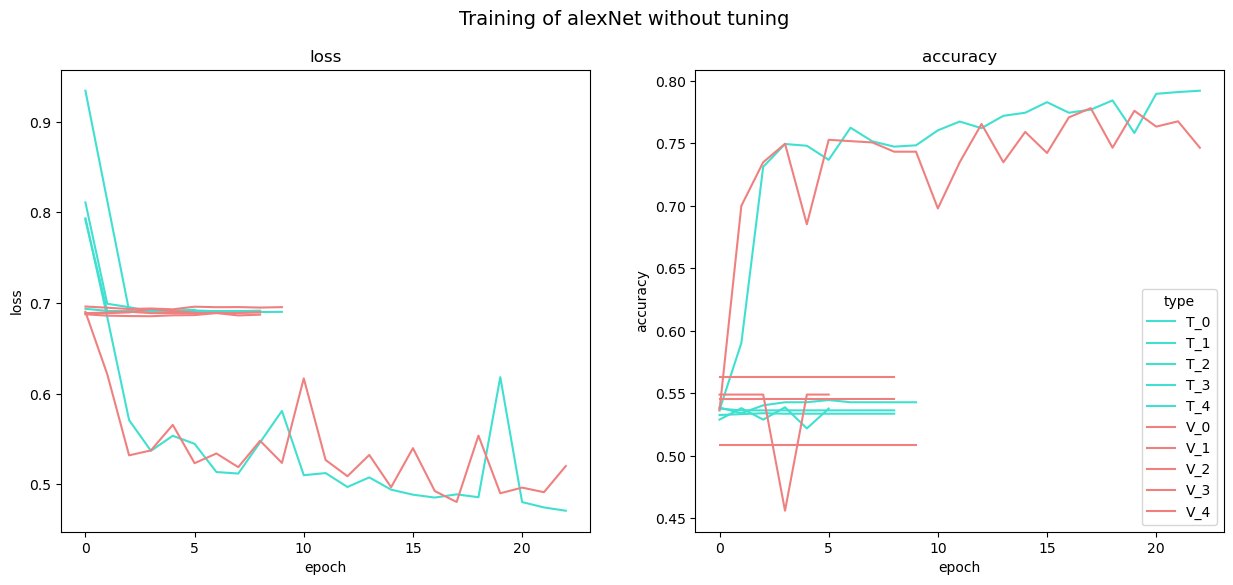

In [61]:
ext = ['_tuning', '_no_tuning']
models = ['mlp', 'leNet5', 'cnn_custom', 'alexNet']
all_paths =[ i + k + '/histories.txt' for i in models for k in ext]

print(all_paths)
for path in all_paths:
    training_show(import_dict(path), path)


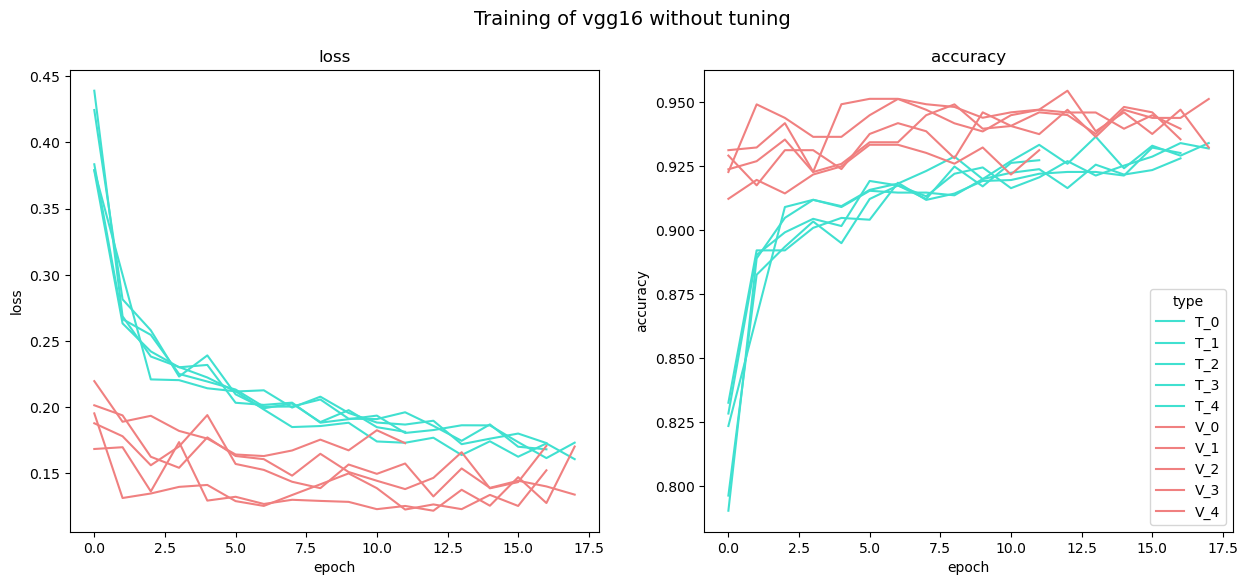

In [62]:
path = 'vgg16_no_tuning/histories.txt'
training_show(import_dict(path),path )

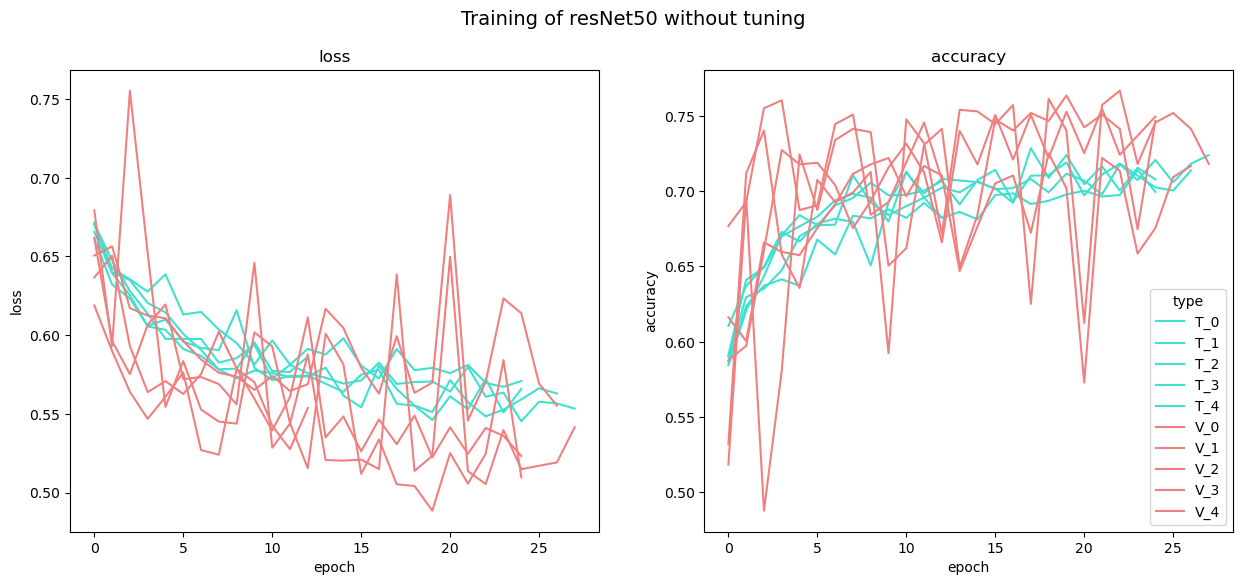

In [63]:
path = 'resNet50_no_tuning/histories.txt'
training_show(import_dict(path),path )